# SSIM

In [7]:
import pandas as pd
import numpy as np


actual = np.load('test_70/embeddings/scores.npy')
df1 = pd.read_csv('test_70_ssim.csv')
#df2 = pd.read_csv('test_70_ARNIQA_crop.csv')
df2 = pd.read_csv('test_70_ARNIQA.csv')
#synthetic = pd.read_csv('test_70_pred.csv').to_numpy()
df3 = pd.read_csv('test_70_pred.csv')
df4 = pd.merge(df1, df2, left_on='distorted_image_path', right_on='image_path')
df = pd.merge(df4, df3, on='image_path')

synthetic = df[['background', 'lighting', 'focus', 'orientation', 'color_calibration', 'resolution', 'field_of_view']]
ssim = df['SSIM']
arniqa = df['quality_score']

import numpy as np

def weighted_average_with_emphasis(scores):
    # Define multipliers for the distortions
    multipliers = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5])  # Adjust these values as needed

    # Apply the multipliers to the scores
    adjusted_scores = scores * multipliers
    
    # Calculate weights based on the adjusted severity scores
    weights = adjusted_scores ** 2  
    sum_weights = weights.sum()
    
    if sum_weights == 0:
        return 0  # or you can choose another default value
    
    weights /= sum_weights
    return np.dot(weights, adjusted_scores)

# weighted average score
def weighted_average_with_emphasis1(scores):
    weights = scores ** 2  # weights based on severity
    sum_weights = weights.sum()
    
    if sum_weights == 0:
        return 0  # or you can choose another default value
    
    weights /= sum_weights
    return np.dot(weights, scores)

actual_scores = np.apply_along_axis(weighted_average_with_emphasis1, 1, actual)
synthetic_scores = synthetic.apply(lambda row: weighted_average_with_emphasis(row), axis=1)

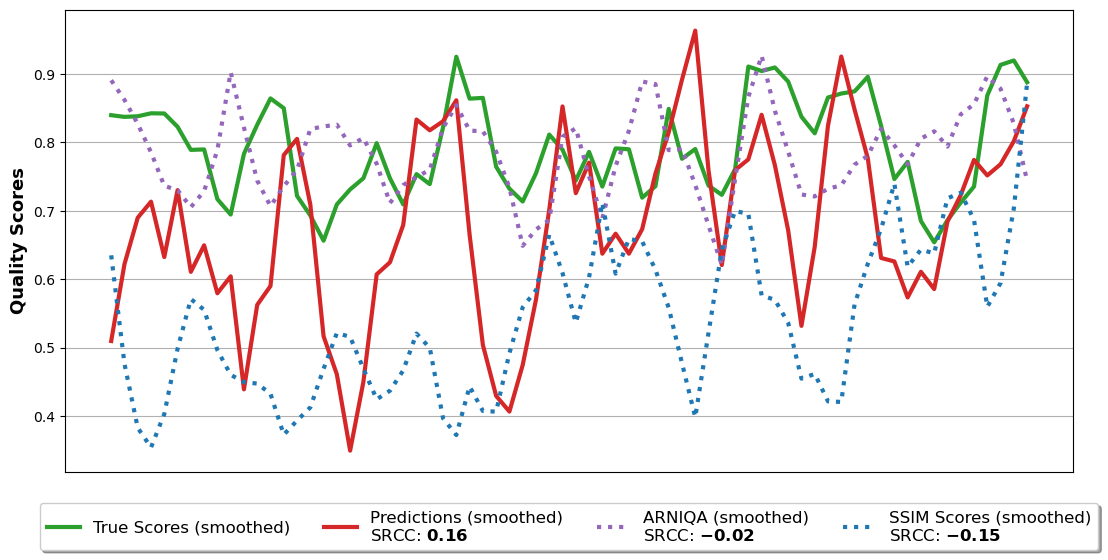

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

# Calculate SRCC values
srcc_ssim, _ = spearmanr(ssim, actual_scores)
srcc_synthetic, _ = spearmanr(synthetic_scores, actual_scores)
srcc_arniqa, _ = spearmanr(arniqa, actual_scores)

# Smooth the data using Savitzky-Golay filter
window_length = 7  # Choose an odd window length
polyorder = 2  # Polynomial order for the filter

smoothed_actual = savgol_filter(actual_scores, window_length, polyorder)
smoothed_synthetic = savgol_filter(synthetic_scores, window_length, polyorder)
smoothed_ssim = savgol_filter(ssim, window_length, polyorder)
smoothed_arniqa = savgol_filter(arniqa, window_length, polyorder)

# Plotting the original and smoothed data
plt.figure(figsize=(13, 6))
plt.plot(smoothed_actual, color='tab:green', label='True Scores (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_synthetic, color='tab:red', label='Predictions (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_arniqa, color='tab:purple', label='ARNIQA (smoothed)', linestyle=':', linewidth=3)
plt.plot(smoothed_ssim, color='tab:blue', label='SSIM Scores (smoothed)', linestyle=':', linewidth=3)

# Create custom legend handles
handles = [
    Line2D([0], [0], color='tab:green', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:red', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:purple', linestyle=':', linewidth=3),
    Line2D([0], [0], color='tab:blue', linestyle=':', linewidth=3),
]
labels = [
    f'True Scores (smoothed)',
    f'Predictions (smoothed)\nSRCC: $\\mathbf{{{srcc_synthetic:.2f}}}$',
    f'ARNIQA (smoothed)\nSRCC: $\\mathbf{{{srcc_arniqa:.2f}}}$',
    f'SSIM Scores (smoothed)\nSRCC: $\\mathbf{{{srcc_ssim:.2f}}}$',
]

# Add the custom legend with SRCC values
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4, fontsize=12)

# Labels and legend
plt.ylabel('Quality Scores', fontsize=13, fontweight='bold')
plt.grid(True)
plt.xticks([])

# Show plot
plt.show()

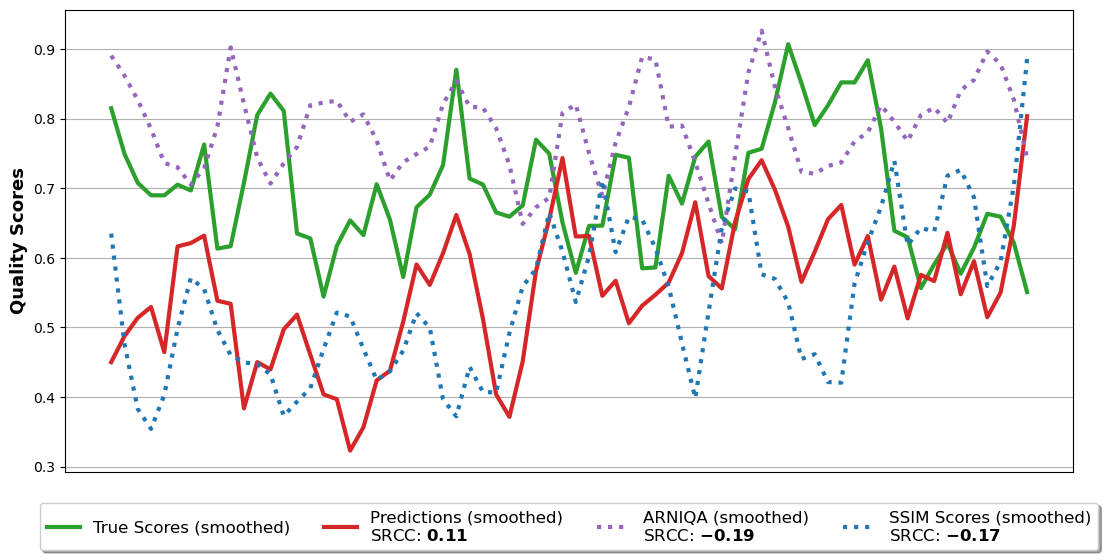

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

# Calculate SRCC values
srcc_ssim, _ = spearmanr(ssim, actual_scores)
srcc_synthetic, _ = spearmanr(synthetic_scores, actual_scores)
srcc_arniqa, _ = spearmanr(arniqa, actual_scores)

# Smooth the data using Savitzky-Golay filter
window_length = 7  # Choose an odd window length
polyorder = 2  # Polynomial order for the filter

smoothed_actual = savgol_filter(actual_scores, window_length, polyorder)
smoothed_synthetic = savgol_filter(synthetic_scores, window_length, polyorder)
smoothed_ssim = savgol_filter(ssim, window_length, polyorder)
smoothed_arniqa = savgol_filter(arniqa, window_length, polyorder)

# Plotting the original and smoothed data
plt.figure(figsize=(13, 6))
plt.plot(smoothed_actual, color='tab:green', label='True Scores (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_synthetic, color='tab:red', label='Predictions (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_arniqa, color='tab:purple', label='ARNIQA (smoothed)', linestyle=':', linewidth=3)
plt.plot(smoothed_ssim, color='tab:blue', label='SSIM Scores (smoothed)', linestyle=':', linewidth=3)

# Create custom legend handles
handles = [
    Line2D([0], [0], color='tab:green', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:red', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:purple', linestyle=':', linewidth=3),
    Line2D([0], [0], color='tab:blue', linestyle=':', linewidth=3),
]
labels = [
    f'True Scores (smoothed)',
    f'Predictions (smoothed)\nSRCC: $\\mathbf{{{srcc_synthetic:.2f}}}$',
    f'ARNIQA (smoothed)\nSRCC: $\\mathbf{{{srcc_arniqa:.2f}}}$',
    f'SSIM Scores (smoothed)\nSRCC: $\\mathbf{{{srcc_ssim:.2f}}}$',
]

# Add the custom legend with SRCC values
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4, fontsize=12)

# Labels and legend
plt.ylabel('Quality Scores', fontsize=13, fontweight='bold')
plt.grid(True)
plt.xticks([])

# Show plot
plt.show()

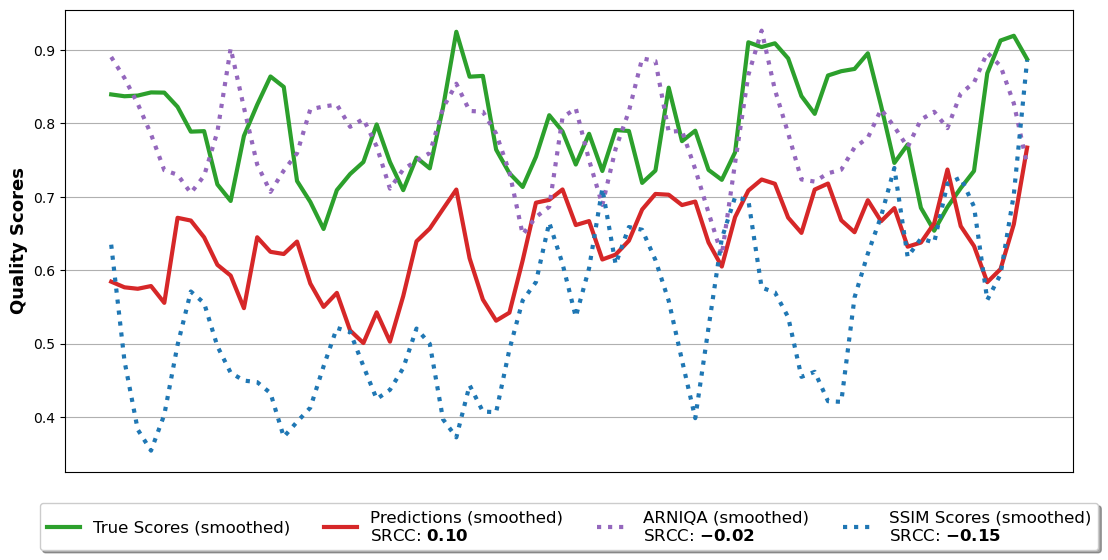

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

# Calculate SRCC values
srcc_ssim, _ = spearmanr(ssim, actual_scores)
srcc_synthetic, _ = spearmanr(synthetic_scores, actual_scores)
srcc_arniqa, _ = spearmanr(arniqa, actual_scores)

# Smooth the data using Savitzky-Golay filter
window_length = 7  # Choose an odd window length
polyorder = 2  # Polynomial order for the filter

smoothed_actual = savgol_filter(actual_scores, window_length, polyorder)
smoothed_synthetic = savgol_filter(synthetic_scores, window_length, polyorder)
smoothed_ssim = savgol_filter(ssim, window_length, polyorder)
smoothed_arniqa = savgol_filter(arniqa, window_length, polyorder)

# Plotting the original and smoothed data
plt.figure(figsize=(13, 6))
plt.plot(smoothed_actual, color='tab:green', label='True Scores (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_synthetic, color='tab:red', label='Predictions (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_arniqa, color='tab:purple', label='ARNIQA (smoothed)', linestyle=':', linewidth=3)
plt.plot(smoothed_ssim, color='tab:blue', label='SSIM Scores (smoothed)', linestyle=':', linewidth=3)

# Create custom legend handles
handles = [
    Line2D([0], [0], color='tab:green', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:red', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:purple', linestyle=':', linewidth=3),
    Line2D([0], [0], color='tab:blue', linestyle=':', linewidth=3),
]
labels = [
    f'True Scores (smoothed)',
    f'Predictions (smoothed)\nSRCC: $\\mathbf{{{srcc_synthetic:.2f}}}$',
    f'ARNIQA (smoothed)\nSRCC: $\\mathbf{{{srcc_arniqa:.2f}}}$',
    f'SSIM Scores (smoothed)\nSRCC: $\\mathbf{{{srcc_ssim:.2f}}}$',
]

# Add the custom legend with SRCC values
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4, fontsize=12)

# Labels and legend
plt.ylabel('Quality Scores', fontsize=13, fontweight='bold')
plt.grid(True)
plt.xticks([])

# Show plot
plt.show()

In [11]:
import pandas as pd
import numpy as np
import json
import os

root = 'test_200'
image_paths = [os.path.join(root, filename) for filename in os.listdir(root) if filename.endswith(('.png', '.jpg', 'jpeg'))]

with open(os.path.join(root, "scores.json"), "r") as json_file:
    scores_data = json.load(json_file)
criteria_order = ['background', 'lighting', 'focus', 'orientation', 'color_calibration', 'resolution', 'field_of_view']
test_scores = []
for img_path in image_paths:
    filename = os.path.basename(img_path)
    test_scores.append([scores_data.get(filename, {}).get(key, 0.0) for key in criteria_order])
actual = np.array(test_scores, dtype=np.float32)
df2 = pd.read_csv('test_200_ARNIQA.csv')
df3 = pd.read_csv('test_200_pred.csv')
df = pd.merge(df2, df3, on='image_path')

arniqa = df['quality_score']
synthetic = df[['background', 'lighting', 'focus', 'orientation', 'color_calibration', 'resolution', 'field_of_view']]

def weighted_average_with_emphasis(scores):
    # Define multipliers for the distortions
    multipliers = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5])  # Adjust these values as needed

    # Apply the multipliers to the scores
    adjusted_scores = scores * multipliers
    
    # Calculate weights based on the adjusted severity scores
    weights = adjusted_scores ** 2  
    sum_weights = weights.sum()
    
    if sum_weights == 0:
        return 0  # or you can choose another default value
    
    weights /= sum_weights
    return np.dot(weights, adjusted_scores)

# weighted average score
def weighted_average_with_emphasis1(scores):
    weights = scores ** 2  # weights based on severity
    sum_weights = weights.sum()
    
    if sum_weights == 0:
        return 0  # or you can choose another default value
    
    weights /= sum_weights
    return np.dot(weights, scores)

actual_scores = np.apply_along_axis(weighted_average_with_emphasis1, 1, actual)
synthetic_scores = synthetic.apply(lambda row: weighted_average_with_emphasis(row), axis=1)

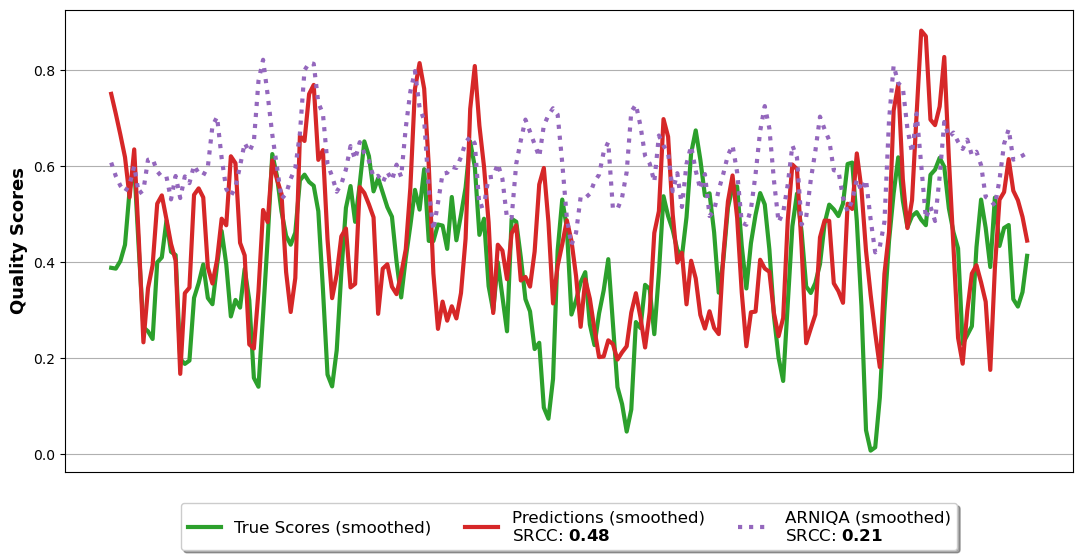

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

# Calculate SRCC values
srcc_synthetic, _ = spearmanr(synthetic_scores, actual_scores)
srcc_arniqa, _ = spearmanr(arniqa, actual_scores)

# Smooth the data using Savitzky-Golay filter
window_length = 7  # Choose an odd window length
polyorder = 2  # Polynomial order for the filter

smoothed_actual = savgol_filter(actual_scores, window_length, polyorder)
smoothed_synthetic = savgol_filter(synthetic_scores, window_length, polyorder)
smoothed_arniqa = savgol_filter(arniqa, window_length, polyorder)

# Plotting the original and smoothed data
plt.figure(figsize=(13, 6))
plt.plot(smoothed_actual, color='tab:green', label='True Scores (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_synthetic, color='tab:red', label='Predictions (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_arniqa, color='tab:purple', label='ARNIQA (smoothed)', linestyle=':', linewidth=3)

# Create custom legend handles
handles = [
    Line2D([0], [0], color='tab:green', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:red', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:purple', linestyle=':', linewidth=3)
]
labels = [
    f'True Scores (smoothed)',
    f'Predictions (smoothed)\nSRCC: $\\mathbf{{{srcc_synthetic:.2f}}}$',
    f'ARNIQA (smoothed)\nSRCC: $\\mathbf{{{srcc_arniqa:.2f}}}$'
]

# Add the custom legend with SRCC values
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3, fontsize=12)

# Labels and legend
plt.ylabel('Quality Scores', fontsize=13, fontweight='bold')
plt.grid(True)
plt.xticks([])

# Show plot
plt.show()

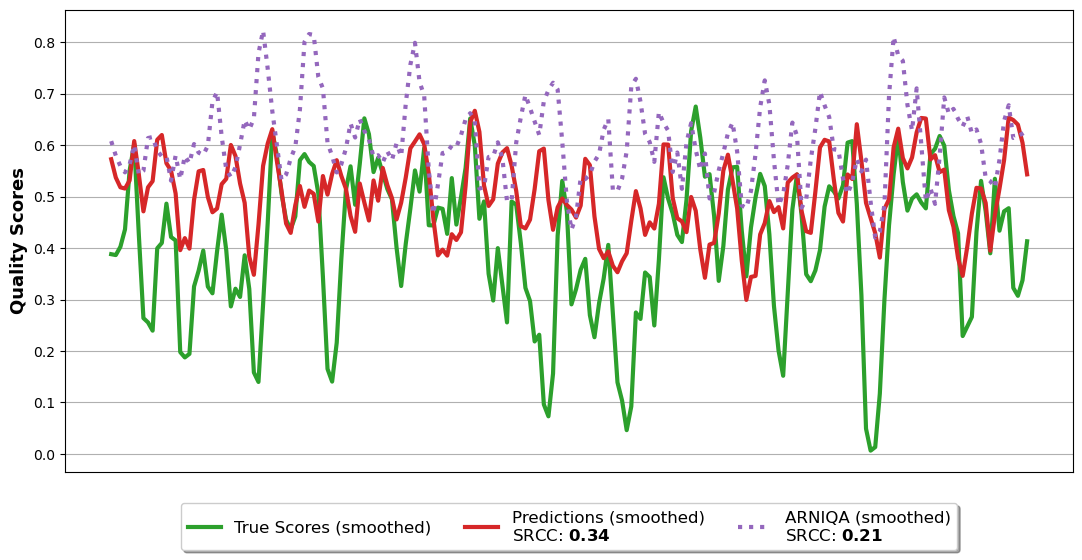

In [153]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

# Calculate SRCC values
srcc_synthetic, _ = spearmanr(synthetic_scores, actual_scores)
srcc_arniqa, _ = spearmanr(arniqa, actual_scores)

# Smooth the data using Savitzky-Golay filter
window_length = 7  # Choose an odd window length
polyorder = 2  # Polynomial order for the filter

smoothed_actual = savgol_filter(actual_scores, window_length, polyorder)
smoothed_synthetic = savgol_filter(synthetic_scores, window_length, polyorder)
smoothed_arniqa = savgol_filter(arniqa, window_length, polyorder)

# Plotting the original and smoothed data
plt.figure(figsize=(13, 6))
plt.plot(smoothed_actual, color='tab:green', label='True Scores (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_synthetic, color='tab:red', label='Predictions (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_arniqa, color='tab:purple', label='ARNIQA (smoothed)', linestyle=':', linewidth=3)

# Create custom legend handles
handles = [
    Line2D([0], [0], color='tab:green', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:red', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:purple', linestyle=':', linewidth=3)
]
labels = [
    f'True Scores (smoothed)',
    f'Predictions (smoothed)\nSRCC: $\\mathbf{{{srcc_synthetic:.2f}}}$',
    f'ARNIQA (smoothed)\nSRCC: $\\mathbf{{{srcc_arniqa:.2f}}}$'
]

# Add the custom legend with SRCC values
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3, fontsize=12)

# Labels and legend
plt.ylabel('Quality Scores', fontsize=13, fontweight='bold')
plt.grid(True)
plt.xticks([])

# Show plot
plt.show()